In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
# importing required libraries

In [199]:
df = pd.read_csv('diabetes-dataset_2.csv')
new_dataframe=df
df.head()
# reading data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [200]:
df.shape
# printing dimension of data

(2000, 9)

In [201]:
df.describe()
# gives description of all columns in data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [202]:
df.info()
# information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [203]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object



# **EDA**



**Feature Selection**

In [204]:
df.drop('SkinThickness',axis = 1,inplace=True)
# we drop Skin thickness column because it has no effect on diabetes

**Feature Engineering**

In [205]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.describe()
# we rename diabetes pedigree function ( genetic risk factor or getting diabetes) to DPF for easier access

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DPF,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,744.000000,80.600000,2.420000,81.000000,1.000000


**Removing Null values**

In [206]:
df.isnull().sum()
# This line calculates the sum of all null values in each column of the data and prints them

Pregnancies      0
Glucose          0
BloodPressure    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

We could see our data has no missing values

**Data Visualization and Preprocessing**

In [207]:
df['Insulin'].describe()
# provide the description of the given column like mean, 3 quartiles, min and max values

count    2000.000000
mean       80.254000
std       111.180534
min         0.000000
25%         0.000000
50%        40.000000
75%       130.000000
max       744.000000
Name: Insulin, dtype: float64

We could see that the minimum value is zero and it doesnt make sense to have Insulin as zero so we replace them in the following steps and also handle outliers

<ipython-input-208-0aa8288c309d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['Insulin'],ax=axies[0],color='y')


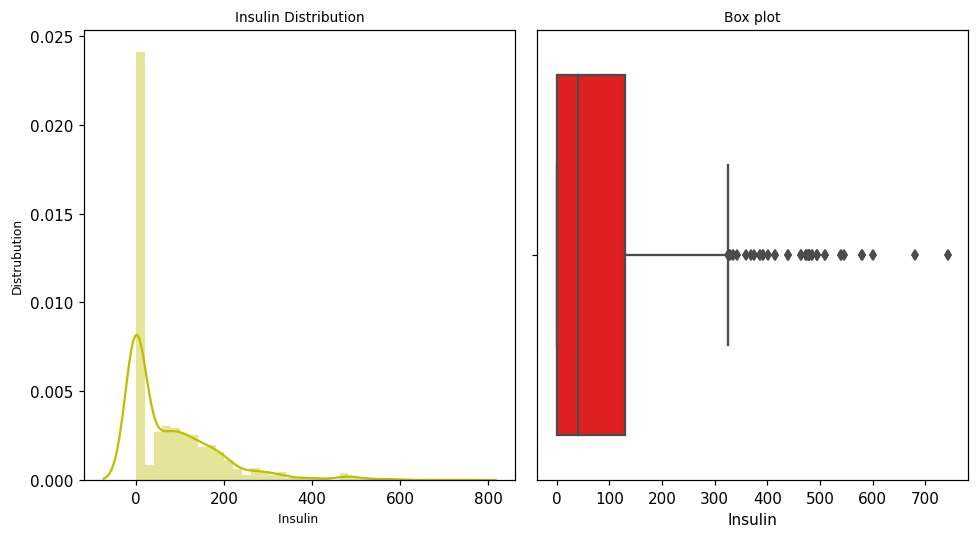

In [208]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['Insulin'],ax=axies[0],color='y')
axies[0].set_title('Insulin Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('Insulin ',fontdict={'fontsize':8})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of insulin column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='Insulin', data=df, ax=axies[1], color='r')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the insulin columns as our x axis and given a title and colors

We draw the distribution plot so we get an understanding of the distribution of data in the insulin column. This histogram tells us how values of this columns fell into each interval and curve is called KDE curve (kernel density estimate curve) and it gives us an estimation of probability density function for a smoother visualization of the spread of data.

The next plot is box plot which gives a 5 point summary of minimum, first quartile (first box ), median (line in middle), third quartile (second box) and lines to left and right outside of the box are called whiskers representing min and max values and points beyond the whiskers are outliers

In [209]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
# This line of code replaces values that are zero with the median of the column.
#since zero is the minimum value in this column and it doesnt make sense for this column to have a values of zero

In [210]:
def standard_based(column_name,df):
    mean_dataSet = df[column_name].mean()
    std_dataSet = df[column_name].std()
    cut_off_value = std_dataSet * 3
    lower_value, upper_value = mean_dataSet - cut_off_value, mean_dataSet + cut_off_value
    new_df = df[(df[column_name] < upper_value) & (df[column_name] > lower_value)]
    return new_df

# Here we create our own function for standard deviation based outlier detection
# cut off value of 3 times standard dev. We return a new data frame with outliers
# removed by including data thats only higher than lower values and less than upper

In above code we create our own function of standard deviation based outlier detection to remove outliers of that specific column in data and return a new data frame. This function calculate mean and standard deviation of that column to understand where most data lies and removes data points accordingly as they are outliers.

In [211]:
df = standard_based('Insulin',df)
# We perform standard deviation based outlier removal on the specified column and store it in our df

<ipython-input-212-0aa8288c309d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['Insulin'],ax=axies[0],color='y')


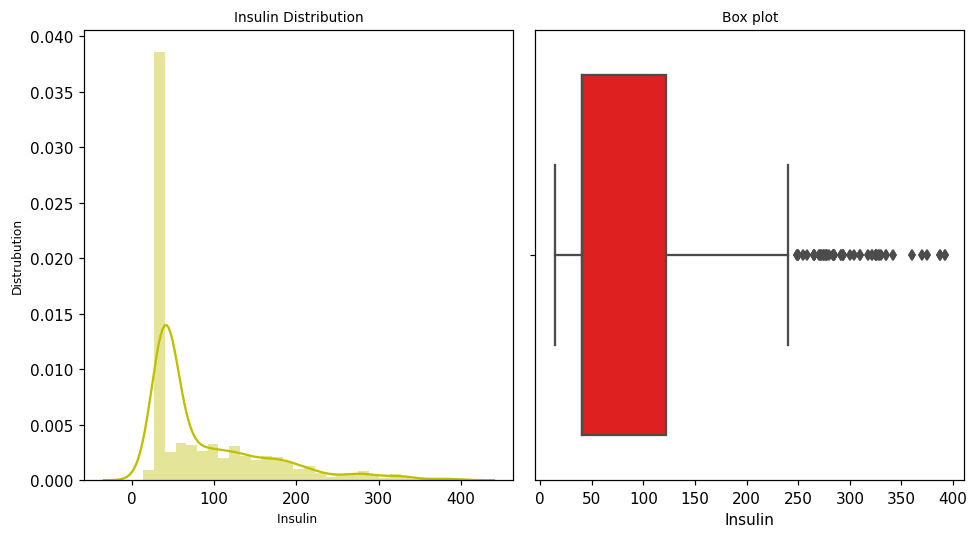

In [212]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['Insulin'],ax=axies[0],color='y')
axies[0].set_title('Insulin Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('Insulin ',fontdict={'fontsize':8})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of insulin column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='Insulin', data=df, ax=axies[1], color='r')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the insulin columns as our x axis and given a title and colors

We draw the visualization once again after handling the outliers to see if there is any change. We can oberve that the outliers are greatly reduced

In [213]:
df['Pregnancies'].describe()
# provide the description of the given column like mean, 3 quartiles, min and max values

count    1950.00000
mean        3.71641
std         3.31424
min         0.00000
25%         1.00000
50%         3.00000
75%         6.00000
max        17.00000
Name: Pregnancies, dtype: float64

We have 0 as minimum and since no pregnancies is possible we dont change it but max value seems too high

<ipython-input-214-616c2f77613a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['Pregnancies'],ax=axies[0],color='r')


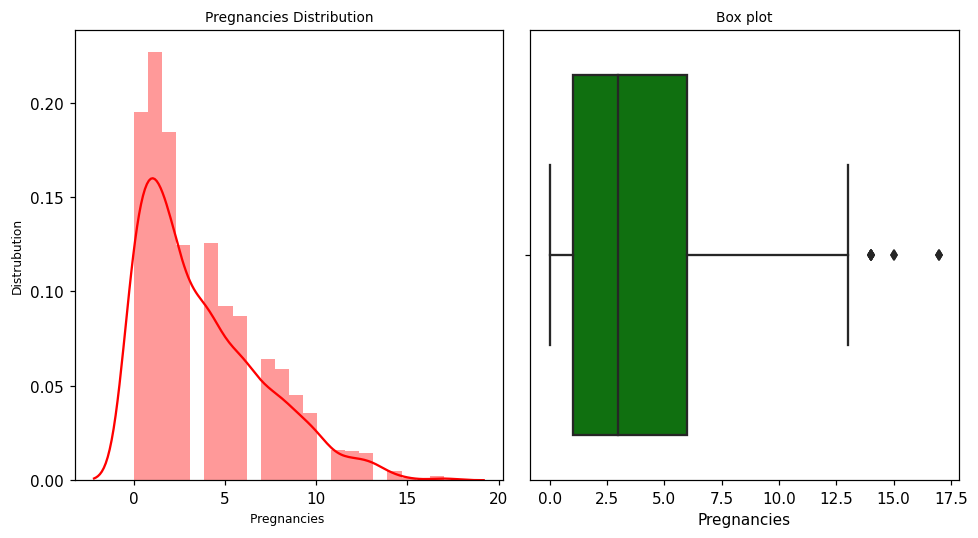

In [214]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['Pregnancies'],ax=axies[0],color='r')
axies[0].set_title('Pregnancies Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('Pregnancies ',fontdict={'fontsize':8})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of Pregnancies column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='Pregnancies', data=df, ax=axies[1], color='g')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the Pregnancies columns as our x axis and given a title and colors

<ipython-input-215-6c65d7aa4f2d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['Pregnancies'],ax=axies[0],color='r')


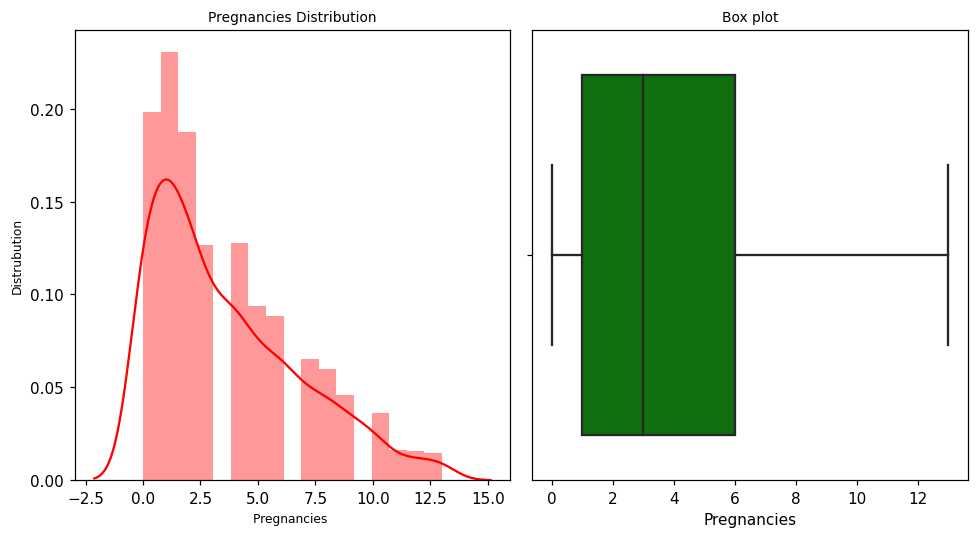

In [215]:
df = standard_based('Pregnancies',df)
# We perform standard deviation based outlier removal on the specified column and store it in our df
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['Pregnancies'],ax=axies[0],color='r')
axies[0].set_title('Pregnancies Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('Pregnancies ',fontdict={'fontsize':8})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='Pregnancies', data=df, ax=axies[1], color='g')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

In [216]:
df['Glucose'].describe()
# provide the description of the given column like mean, 3 quartiles, min and max values

count    1938.000000
mean      120.101135
std        31.727269
min         0.000000
25%        99.000000
50%       116.000000
75%       139.000000
max       199.000000
Name: Glucose, dtype: float64

we have minimum value of zero which is not possible so we change it in following steps

<ipython-input-217-b740fdda2609>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['Glucose'],ax=axies[0],color='y')


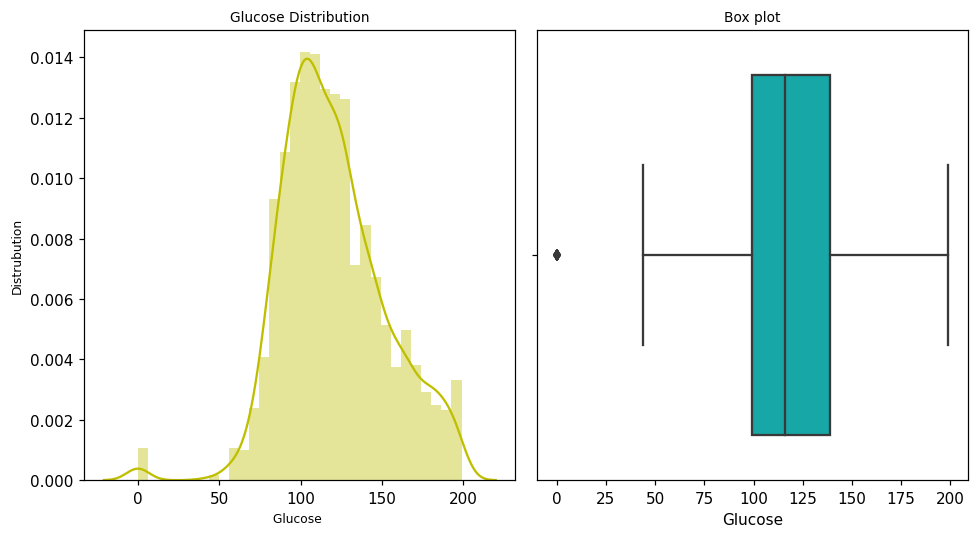

In [217]:

fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['Glucose'],ax=axies[0],color='y')
axies[0].set_title('Glucose Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('Glucose ',fontdict={'fontsize':8})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='Glucose', data=df, ax=axies[1], color='c')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

In [218]:
df.Glucose = df.Glucose.replace(0,df.Glucose.median())
# This line of code replaces values that are zero with the median of the column.
#since zero is the minimum value in this column and it doesnt make sense for this column to have a values of zero

<ipython-input-219-025312e07c21>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['Glucose'],ax=axies[0],color='y')


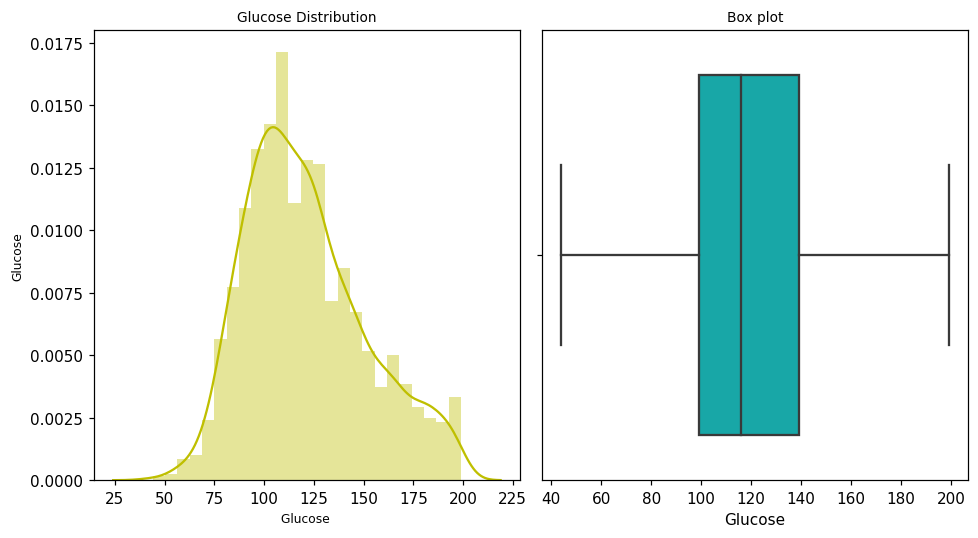

In [219]:
df = standard_based('Glucose',df)
# We perform standard deviation based outlier removal on the specified column and store it in our df
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['Glucose'],ax=axies[0],color='y')
axies[0].set_title('Glucose Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('Glucose ',fontdict={'fontsize':8})
axies[0].set_ylabel('Glucose',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='Glucose', data=df, ax=axies[1], color='c')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

In [220]:
df['BloodPressure'].describe()
# provide the description of the given column like mean, 3 quartiles, min and max values

count    1938.000000
mean       69.021156
std        19.390215
min         0.000000
25%        62.500000
50%        72.000000
75%        80.000000
max       122.000000
Name: BloodPressure, dtype: float64

Pressure value of zero is not possible and max is also too high. we address them in the following steps

<ipython-input-221-d6688a453543>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['BloodPressure'],ax=axies[0],color='c')


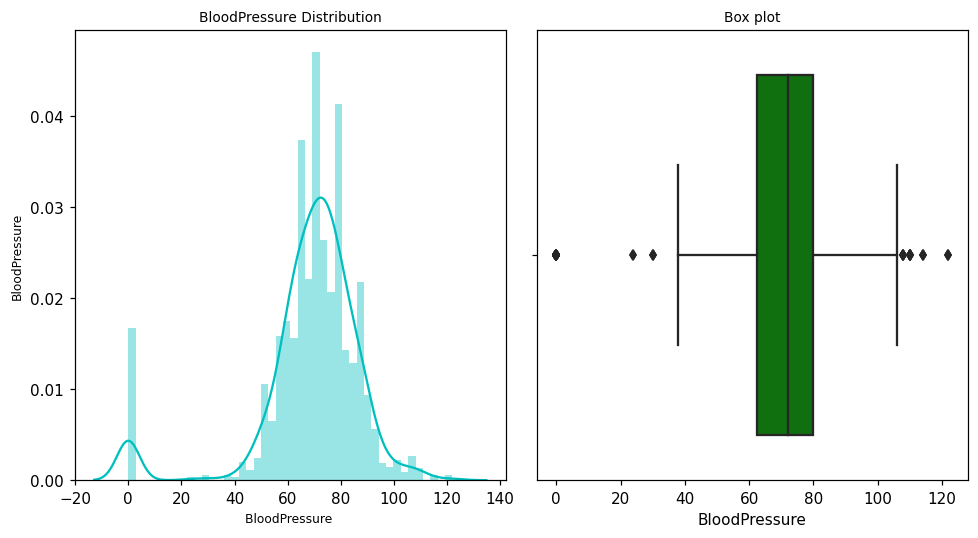

In [221]:

fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['BloodPressure'],ax=axies[0],color='c')
axies[0].set_title('BloodPressure Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('BloodPressure ',fontdict={'fontsize':8})
axies[0].set_ylabel('BloodPressure',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='BloodPressure', data=df, ax=axies[1], color='g')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

In [222]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
# This line of code replaces values that are zero with the median of the column.
#since zero is the minimum value in this column and it doesnt make sense for this column to have a values of zero

<ipython-input-223-cf0c808030a1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['BloodPressure'],ax=axies[0],color='c')


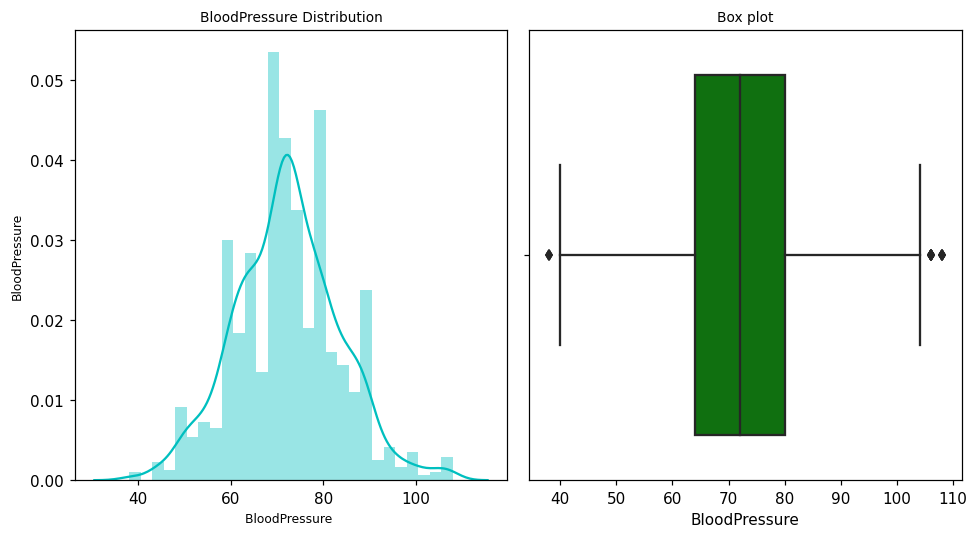

In [223]:
df = standard_based('BloodPressure',df)
# We perform standard deviation based outlier removal on the specified column and store it in our df
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['BloodPressure'],ax=axies[0],color='c')
axies[0].set_title('BloodPressure Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('BloodPressure ',fontdict={'fontsize':8})
axies[0].set_ylabel('BloodPressure',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='BloodPressure', data=df, ax=axies[1], color='g')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

In [224]:
df['BMI'].describe()
# provide the description of the given column like mean, 3 quartiles, min and max values

count    1920.000000
mean       31.939792
std         8.009152
min         0.000000
25%        27.200000
50%        32.000000
75%        36.400000
max        80.600000
Name: BMI, dtype: float64

BMI of zero doesnt make sense

<ipython-input-225-9812fc4abec4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['BMI'],ax=axies[0],color='g')


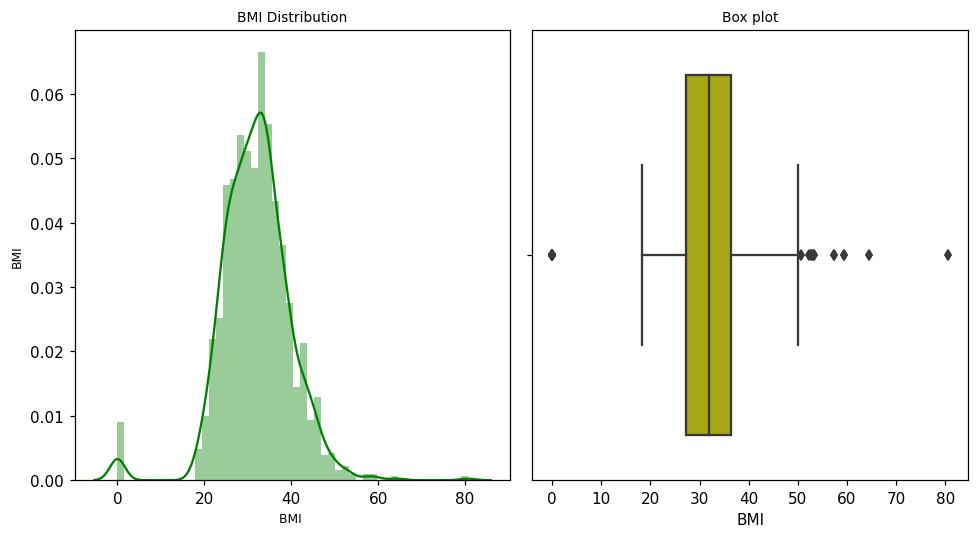

In [225]:

fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['BMI'],ax=axies[0],color='g')
axies[0].set_title('BMI Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('BMI ',fontdict={'fontsize':8})
axies[0].set_ylabel('BMI',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='BMI', data=df, ax=axies[1], color='y')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

In [226]:
df.BMI = df.BMI.replace(0,df.BMI.median())
# This line of code replaces values that are zero with the median of the column.
#since zero is the minimum value in this column and it doesnt make sense for this column to have a values of zero

<ipython-input-227-a02cfc027247>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['BMI'],ax=axies[0],color='g')


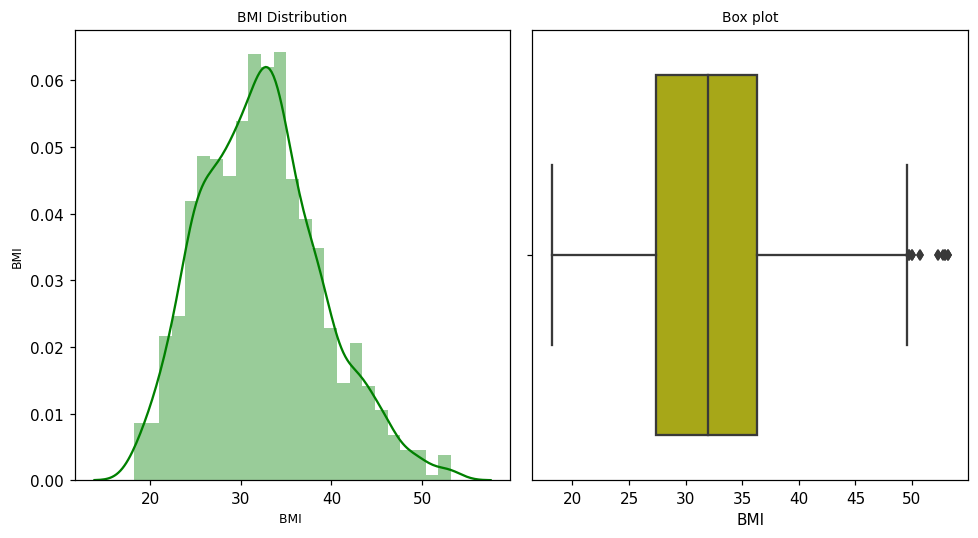

In [227]:
df = standard_based('BMI',df)
# We perform standard deviation based outlier removal on the specified column and store it in our df
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['BMI'],ax=axies[0],color='g')
axies[0].set_title('BMI Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('BMI ',fontdict={'fontsize':8})
axies[0].set_ylabel('BMI',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='BMI', data=df, ax=axies[1], color='y')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

In [228]:
df['DPF'].describe()
# provide the description of the given column like mean, 3 quartiles, min and max values

count    1910.000000
mean        0.463908
std         0.305139
min         0.078000
25%         0.244000
50%         0.370000
75%         0.612750
max         1.893000
Name: DPF, dtype: float64

<ipython-input-229-624d01702772>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['DPF'],ax=axies[0],color='r')


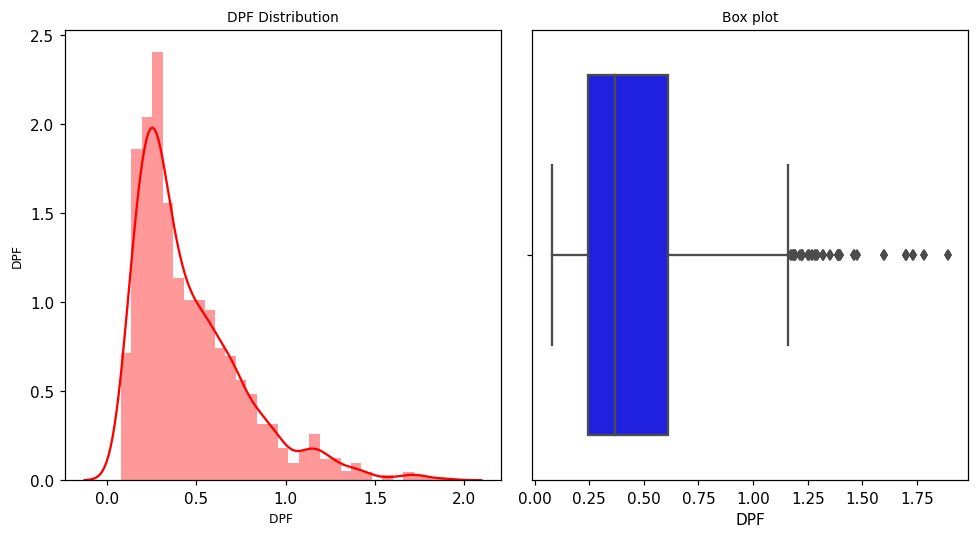

In [229]:

fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['DPF'],ax=axies[0],color='r')
axies[0].set_title('DPF Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('DPF ',fontdict={'fontsize':8})
axies[0].set_ylabel('DPF',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='DPF', data=df, ax=axies[1], color='b')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

<ipython-input-230-1b5e48309189>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['DPF'],ax=axies[0],color='r')


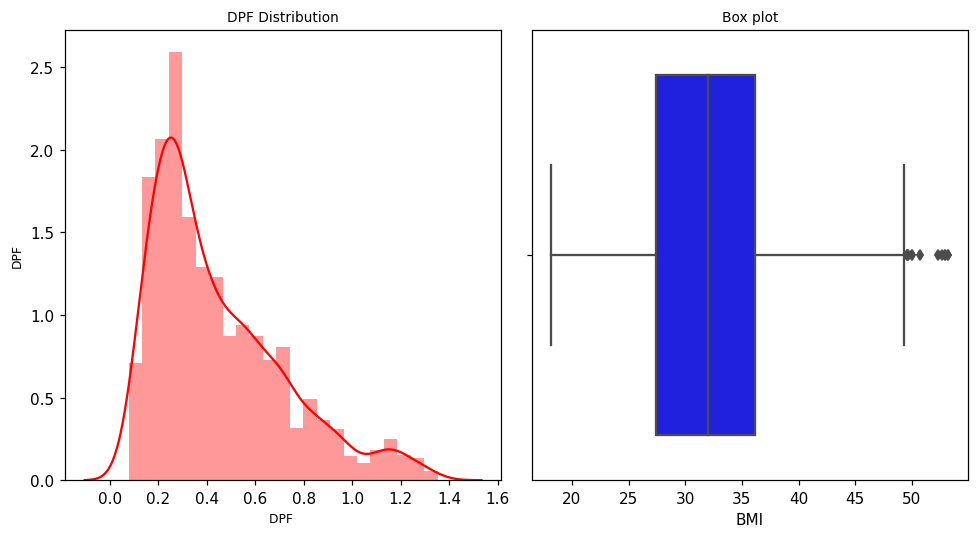

In [230]:
df = standard_based('DPF',df)
# We perform standard deviation based outlier removal on the specified column and store it in our df
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['DPF'],ax=axies[0],color='r')
axies[0].set_title('DPF Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('DPF ',fontdict={'fontsize':8})
axies[0].set_ylabel('DPF',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='BMI', data=df, ax=axies[1], color='b')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

In [231]:
df['Age'].describe()
# provide the description of the given column like mean, 3 quartiles, min and max values

count    1879.000000
mean       33.138371
std        11.856077
min        21.000000
25%        24.000000
50%        29.000000
75%        40.000000
max        81.000000
Name: Age, dtype: float64

<ipython-input-232-3bf413e9f735>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['Age'],ax=axies[0],color='g')


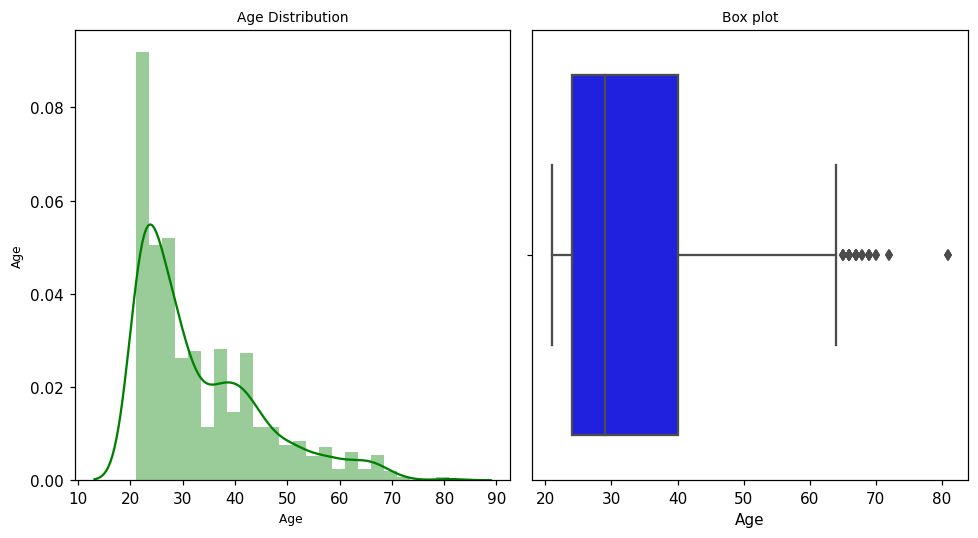

In [232]:

fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['Age'],ax=axies[0],color='g')
axies[0].set_title('Age Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('Age ',fontdict={'fontsize':8})
axies[0].set_ylabel('Age',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='Age', data=df, ax=axies[1], color='b')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

<ipython-input-233-4203acede0ca>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  subplt0=sns.distplot(df['Age'],ax=axies[0],color='g')


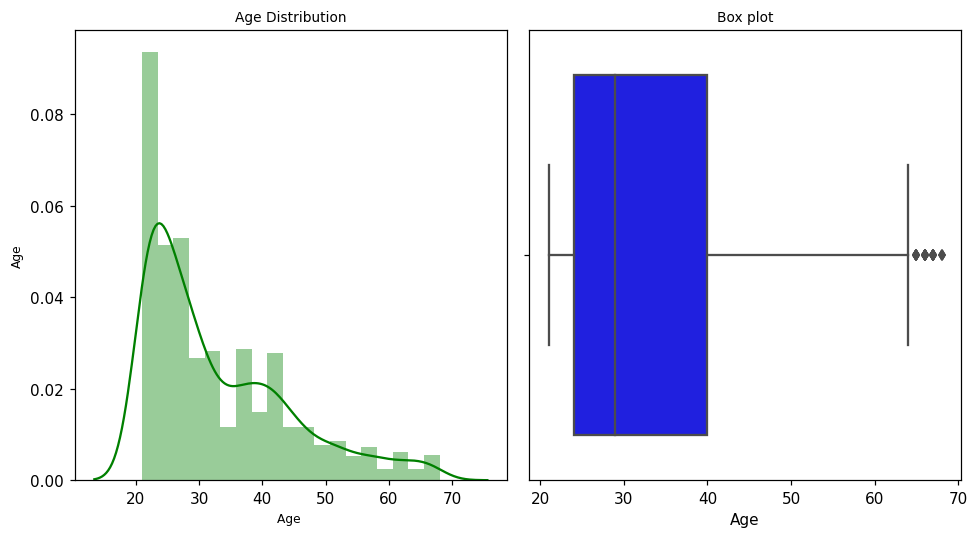

In [233]:
df = standard_based('Age',df)
# We perform standard deviation based outlier removal on the specified column and store it in our df
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=110,figsize = (9,5))
# we create a fig with subplot with 1 row and 2 columns
subplt0=sns.distplot(df['Age'],ax=axies[0],color='g')
axies[0].set_title('Age Distribution',fontdict={'fontsize':9})
axies[0].set_xlabel('Age ',fontdict={'fontsize':8})
axies[0].set_ylabel('Age',fontdict={'fontsize':8})
plt.tight_layout()

# This is our first subplot denoted by axies[0] and its a distribution plot
# of given column using a histogram with KDE (Kernel density estimate)
# and we set the respective x and y labels, colors and title

subplt1 = sns.boxplot(x='Age', data=df, ax=axies[1], color='b')
axies[1].set_title('Box plot',fontdict={'fontsize':9})
plt.tight_layout()
# This is our second subplot which is a box plot denoted by axies[1] and we
# have set the given columns as our x axis and given a title and colors

# **Inferential Statistical Analysis**

In [234]:

from scipy import stats
# Perform a correlation analysis
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Perform a t-test or Mann-Whitney U test to compare variables between Outcome groups
outcome_0 = df[df['Outcome'] == 0]
outcome_1 = df[df['Outcome'] == 1]

# For example, let's perform a t-test on 'Glucose' between Outcome groups
glucose_outcome_0 = outcome_0['Glucose']
glucose_outcome_1 = outcome_1['Glucose']

t_stat, p_value = stats.ttest_ind(glucose_outcome_0, glucose_outcome_1)
# Mann-Whitney U test (non-parametric alternative if assumptions of t-test are violated)
# U_stat, p_value = stats.mannwhitneyu(glucose_outcome_0, glucose_outcome_1)

print(f"\nT-test for Glucose between Outcome groups:")
print(f"T-statistic: {t_stat}\nP-value: {p_value}")

# Perform ANOVA or Kruskal-Wallis H-test for comparing multiple groups
# For example, ANOVA on 'Age' among different Outcome groups
age_outcome_0 = outcome_0['Age']
age_outcome_1 = outcome_1['Age']

f_stat, p_value_anova = stats.f_oneway(age_outcome_0, age_outcome_1)
# Kruskal-Wallis H-test (non-parametric alternative if assumptions of ANOVA are violated)
# h_stat, p_value_kruskal = stats.kruskal(age_outcome_0, age_outcome_1)

print(f"\nANOVA for Age between Outcome groups:")
print(f"F-statistic: {f_stat}\nP-value: {p_value_anova}")



Correlation Matrix:
               Pregnancies   Glucose  BloodPressure   Insulin       BMI  \
Pregnancies       1.000000  0.123720       0.206999 -0.059094  0.030017   
Glucose           0.123720  1.000000       0.186335  0.331657  0.199520   
BloodPressure     0.206999  0.186335       1.000000 -0.048198  0.282666   
Insulin          -0.059094  0.331657      -0.048198  1.000000  0.200951   
BMI               0.030017  0.199520       0.282666  0.200951  1.000000   
DPF               0.020666  0.072307       0.025924  0.188449  0.123485   
Age               0.543612  0.284326       0.348239 -0.030592  0.056780   
Outcome           0.217060  0.493214       0.189646  0.126631  0.284074   

                    DPF       Age   Outcome  
Pregnancies    0.020666  0.543612  0.217060  
Glucose        0.072307  0.284326  0.493214  
BloodPressure  0.025924  0.348239  0.189646  
Insulin        0.188449 -0.030592  0.126631  
BMI            0.123485  0.056780  0.284074  
DPF            1.000000  0.

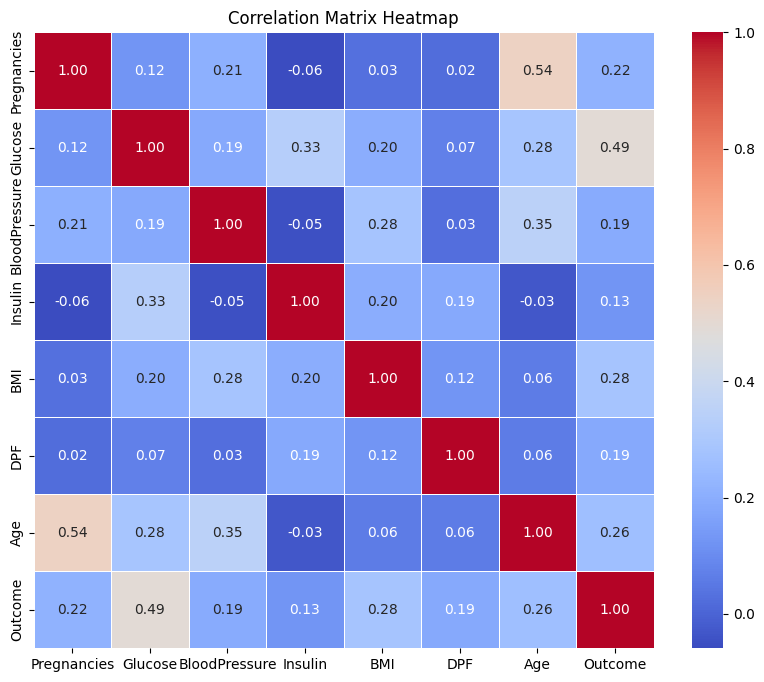

In [235]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()

This visualization is a heatmap of correlation and helps us understand the relation ships between variables

# **Univariate Analysis**

Descriptive Statistics for 'Glucose':
count    1864.000000
mean      120.357833
std        29.920527
min        44.000000
25%        99.000000
50%       116.000000
75%       139.000000
max       198.000000
Name: Glucose, dtype: float64


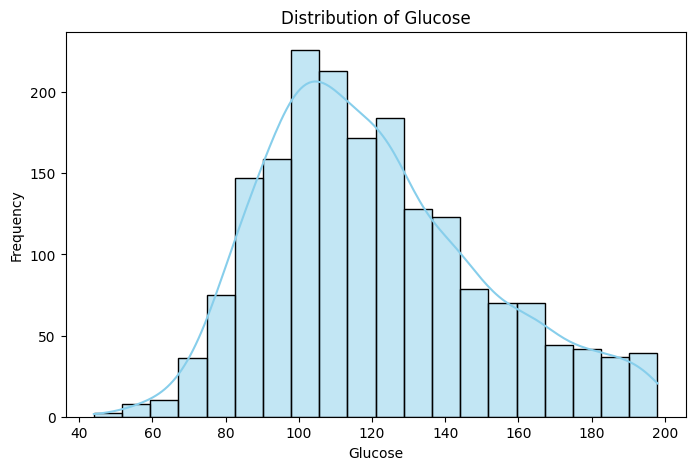

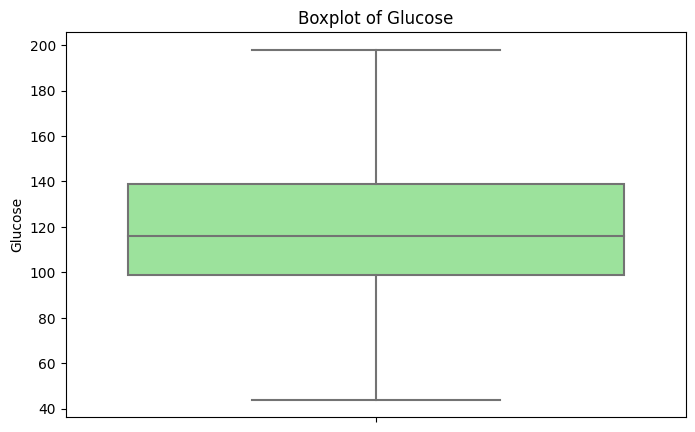

In [236]:
# Univariate analysis on glucose variable
variable_to_analyze = 'Glucose'

# Descriptive statistics
print("Descriptive Statistics for 'Glucose':")
print(df[variable_to_analyze].describe())

# Distribution visualization (Histogram and KDE plot)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x=variable_to_analyze, kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {variable_to_analyze}')
plt.xlabel(variable_to_analyze)
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize central tendency and spread
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=variable_to_analyze, color='lightgreen')
plt.title(f'Boxplot of {variable_to_analyze}')
plt.ylabel(variable_to_analyze)
plt.show()

Descriptive Statistics for 'Insulin':
count    1864.000000
mean       88.582618
std        73.064201
min        15.000000
25%        40.000000
50%        40.000000
75%       122.000000
max       392.000000
Name: Insulin, dtype: float64


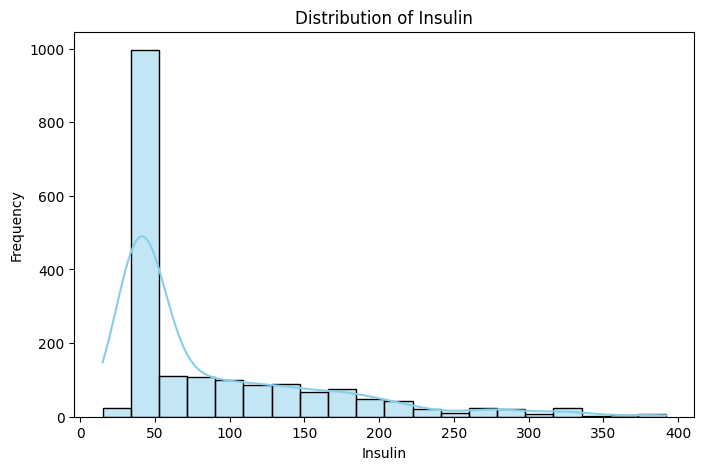

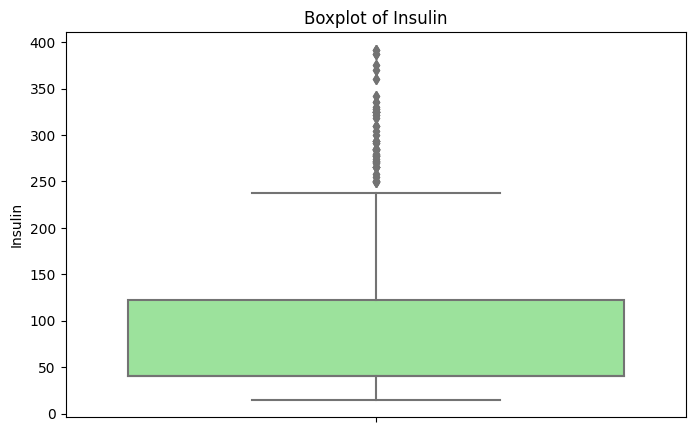

In [237]:
# Univariate analysis on Insulin variable
variable_to_analyze = 'Insulin'

# Descriptive statistics
print("Descriptive Statistics for 'Insulin':")
print(df[variable_to_analyze].describe())

# Distribution visualization (Histogram and KDE plot)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x=variable_to_analyze, kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {variable_to_analyze}')
plt.xlabel(variable_to_analyze)
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize central tendency and spread
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=variable_to_analyze, color='lightgreen')
plt.title(f'Boxplot of {variable_to_analyze}')
plt.ylabel(variable_to_analyze)
plt.show()

# **Multivariate analysis**

In [238]:
import statsmodels.api as sm
# Define independent variables (features) and the dependent variable (Outcome)
# Assuming 'Outcome' is the target variable indicating diabetes presence (0 or 1)
independent_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DPF', 'Age']
dependent_var = 'Outcome'

# Add a constant for the intercept term
df['intercept'] = 1.0

# Split data into independent (X) and dependent (y) variables
X = df[independent_vars + ['intercept']]
y = df[dependent_var]

# Fit multiple regression model
model = sm.Logit(y, X)
result = model.fit()

# Print summary of the regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.451721
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1864
Model:                          Logit   Df Residuals:                     1856
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.2881
Time:                        23:11:20   Log-Likelihood:                -842.01
converged:                       True   LL-Null:                       -1182.7
Covariance Type:            nonrobust   LLR p-value:                6.893e-143
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1087      0.022      4.969      0.000       0.066       0.152
Glucose           0.

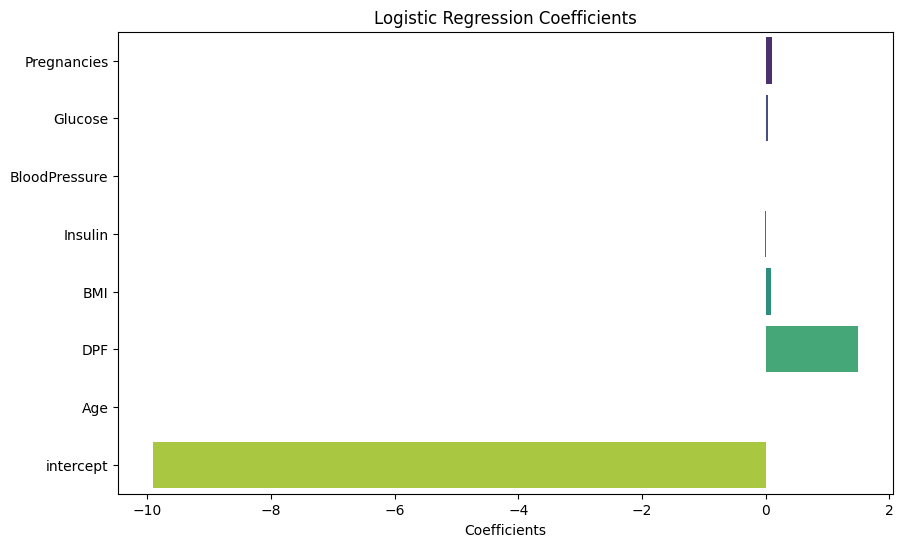

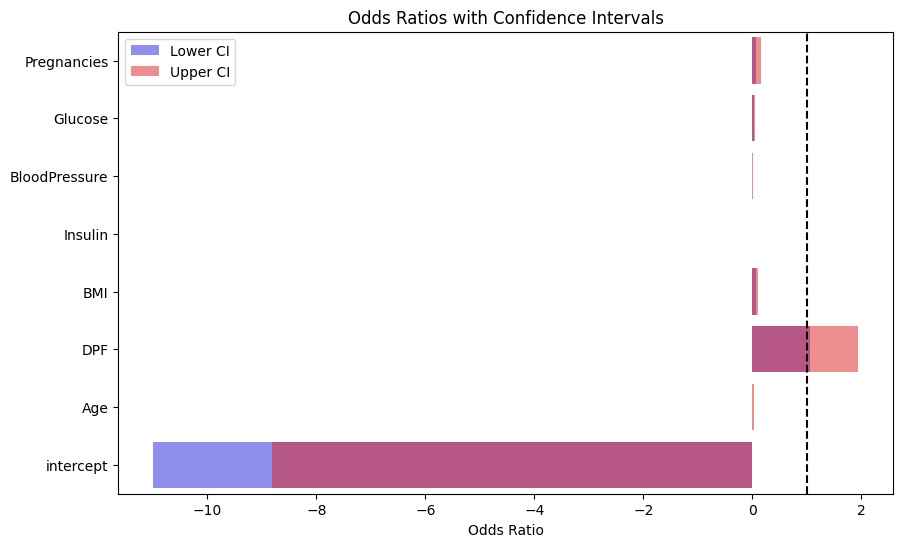

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=result.params, y=result.params.index, palette='viridis')
plt.xlabel('Coefficients')
plt.title('Logistic Regression Coefficients')
plt.show()

# Visualizing odds ratios with confidence intervals
odds_ratios = result.params.apply(lambda x: np.exp(x))
conf_ints = result.conf_int()
conf_ints['Odds Ratio'] = odds_ratios

plt.figure(figsize=(10, 6))
sns.barplot(x=conf_ints[0], y=conf_ints.index, color='blue', alpha=0.5, label='Lower CI')
sns.barplot(x=conf_ints[1], y=conf_ints.index, color='red', alpha=0.5, label='Upper CI')
plt.axvline(x=1, color='black', linestyle='--')
plt.legend()
plt.xlabel('Odds Ratio')
plt.title('Odds Ratios with Confidence Intervals')
plt.show()

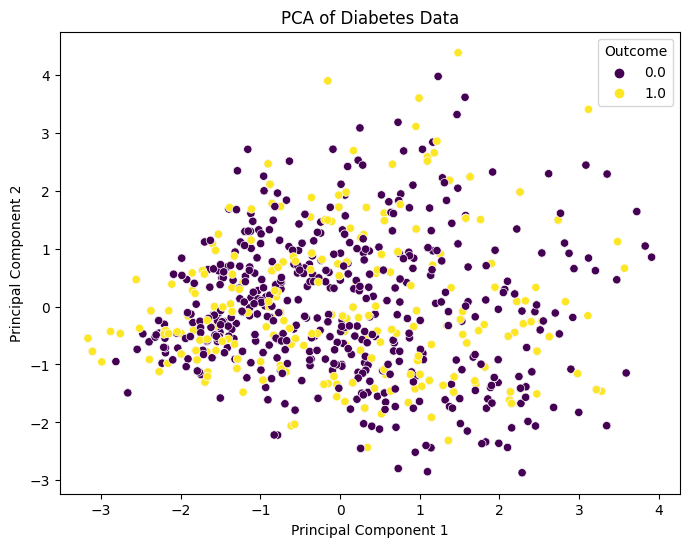

Explained variance ratio: [0.28481304 0.20751251]


In [240]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you want to perform PCA on certain columns (features)
# Select the columns for PCA, excluding the target variable ('Outcome')
columns_for_pca = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DPF', 'Age']

# Separate the features for PCA
X = df[columns_for_pca]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components (e.g., 2 for visualization)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate principal components with target variable ('Outcome') for analysis or visualization
final_df = pd.concat([principal_df, df[['Outcome']]], axis=1)

# Plot PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Outcome', data=final_df, palette='viridis')
plt.title('PCA of Diabetes Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")


In [241]:
df.drop('intercept',axis = 1,inplace=True)

In [242]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DPF,Age,Outcome
count,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000
mean,3.666309,120.357833,72.145386,88.582618,32.264861,0.445548,32.824034,0.330472
std,3.198433,29.920527,11.323942,73.064201,6.603197,0.271987,11.364367,0.470509
min,0.000000,44.000000,38.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,40.000000,27.500000,0.242500,24.000000,0.000000
50%,3.000000,116.000000,72.000000,40.000000,32.000000,0.364000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,122.000000,36.300000,0.597000,40.000000,1.000000
max,13.000000,198.000000,108.000000,392.000000,53.200000,1.353000,68.000000,1.000000


# **Decision Tree**

In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# splitting features and targets
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DPF', 'Age']
target = 'Outcome'

# Split data into features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [244]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       243
           1       0.96      0.92      0.94       130

    accuracy                           0.96       373
   macro avg       0.96      0.95      0.96       373
weighted avg       0.96      0.96      0.96       373



The above is the accuracy without any hyperparameter tuning and feature scaling

**Hyperparameters Tuning**

In [245]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their potential values to search
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameters: {accuracy:.2f}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy with best hyperparameters: 0.93


Above is the accuracy score after tuning the hyperparameters and we can see that it has score of 93 which is lower than score of 96 without any tuning and move to feature scaling

**Scaling**

In [246]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Using minmax scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96

Confusion Matrix:
[[238   5]
 [ 10 120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       243
           1       0.96      0.92      0.94       130

    accuracy                           0.96       373
   macro avg       0.96      0.95      0.96       373
weighted avg       0.96      0.96      0.96       373



In the above we perform feature scaling and chose min max scaler to see if performance improves further. this scales the values between 0 and 1 . we do this to improve performance

**Performance**

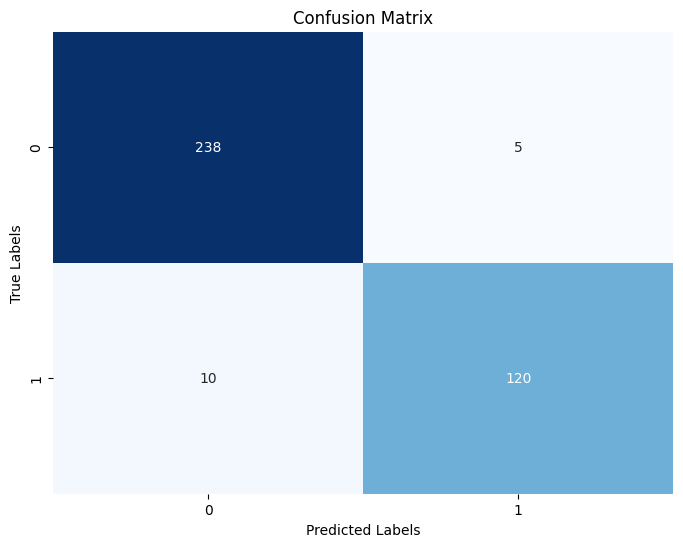

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [248]:
# performance metrics
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1-score: {dt_f1:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.92
F1-score: 0.94


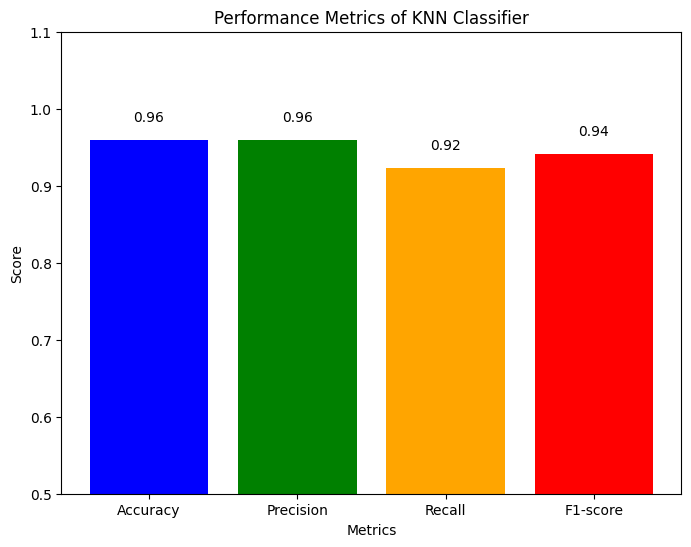

In [249]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.5, 1.1)  # Set y-axis limit to range from 0 to 1.1
plt.title('Performance Metrics of KNN Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Add values on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

These are the best performance metrics after choosing best parameters and feature scaling

**Cross Validation**

In [250]:
from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
k_folds = 5  # number of folds

# Perform k-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_scaled, y, cv=kf, scoring='accuracy')  # Using accuracy as the evaluation metric

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
dt_cv_scores = np.mean(cv_scores)

Cross-validation Scores: [0.95978552 0.98123324 0.97319035 0.95978552 0.99193548]
Mean Accuracy: 0.97


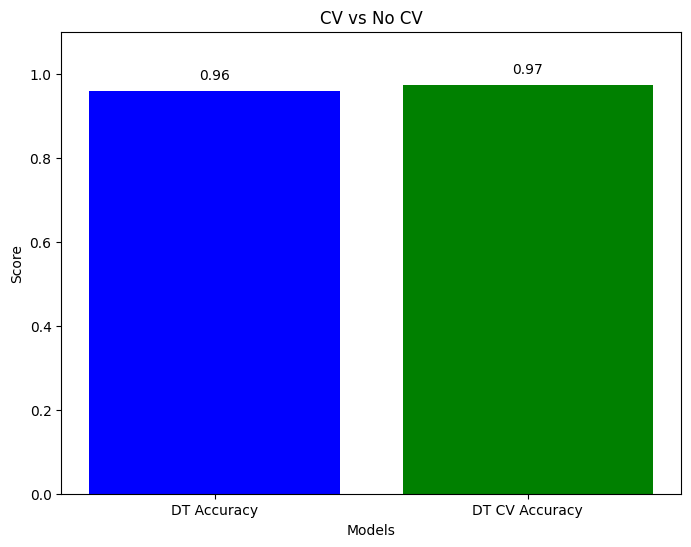

In [251]:
# Labels and values for the scores
labels = ['DT Accuracy', 'DT CV Accuracy']
scores = [dt_accuracy, dt_cv_scores]  # Average of cross-validation scores

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green'])
plt.ylim(0, 1.1)  # Set y-axis limit to ensure scores range from 0 to 1.1
plt.title('CV vs No CV')
plt.xlabel('Models')
plt.ylabel('Score')

# Add annotations on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

Here we performed k-fold Cross validation and compared the accuracy without CV. We perform cross validation because it test how model performs on new data.

# **Random Forest**

In [252]:

from sklearn.ensemble import RandomForestClassifier


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98

Confusion Matrix:
[[240   3]
 [  4 126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       243
           1       0.98      0.97      0.97       130

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373



The above is the accuracy without any hyperparameter tuning and feature scaling

**Hyperparameters Tuning**

In [253]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model obtained from Grid Search
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with Best Model: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Accuracy with Best Model: 0.98

Confusion Matrix:
[[240   3]
 [  6 124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       243
           1       0.98      0.95      0.96       130

    accuracy                           0.98       373
   macro avg       0.98      0.97      0.97       373
weighted avg       0.98      0.98      0.98       373



Above is the accuracy score after tuning the hyperparameters and we can see that it has same score. so we use the above parameters and continue with feature scaling

**Scaling**

In [254]:
# Using minmax scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98

Confusion Matrix:
[[240   3]
 [  4 126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       243
           1       0.98      0.97      0.97       130

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373



In the above we perform feature scaling and chose min max scaler to see if performance improves further. this scales the values between 0 and 1 . we do this to improve performance

**Performance**

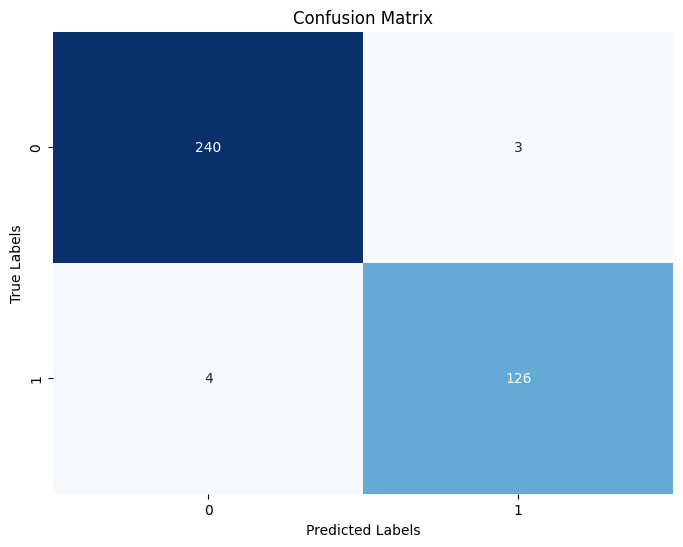

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [256]:
# performance metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-score: {rf_f1:.2f}")

Accuracy: 0.98
Precision: 0.98
Recall: 0.97
F1-score: 0.97


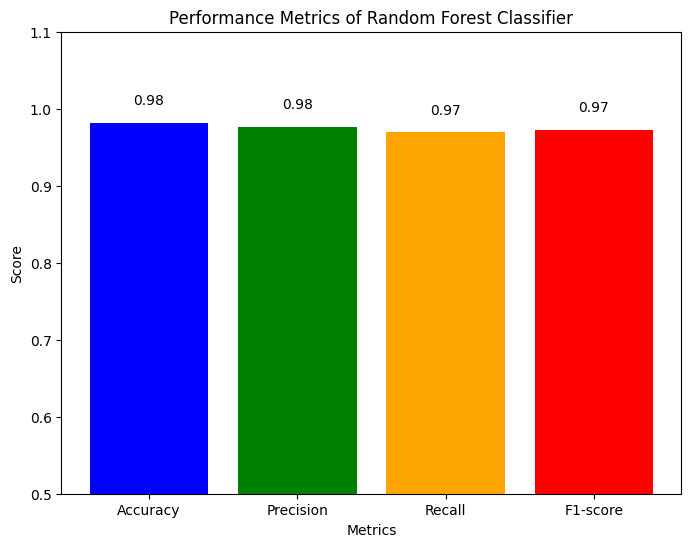

In [257]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.5, 1.1)  # Set y-axis limit to range from 0 to 1.1
plt.title('Performance Metrics of Random Forest Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Add values on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

These are the best performance metrics after choosing best parameters and feature scaling.

**Cross Validation**

In [258]:
from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
k_folds = 5  # number of folds

# Perform k-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')  # Using accuracy as the evaluation metric

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
rf_cv_scores = np.mean(cv_scores)

Cross-validation Scores: [0.97587131 0.97855228 0.99463807 0.97587131 0.99462366]
Mean Accuracy: 0.98


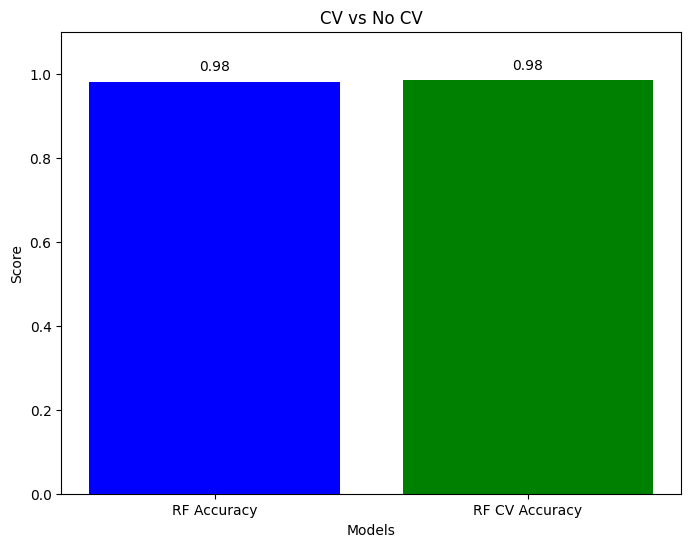

In [259]:
# Labels and values for the scores
labels = ['RF Accuracy', 'RF CV Accuracy']
scores = [rf_accuracy, rf_cv_scores]  # Average of cross-validation scores

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green'])
plt.ylim(0, 1.1)  # Set y-axis limit to ensure scores range from 0 to 1.1
plt.title('CV vs No CV')
plt.xlabel('Models')
plt.ylabel('Score')

# Add annotations on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

Here we performed k-fold Cross validation and compared the accuracy without CV. We perform cross validation because it test how model performs on new data.

# **XGBoost**

In [260]:

from xgboost import XGBClassifier
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98

Confusion Matrix:
[[242   1]
 [  8 122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       243
           1       0.99      0.94      0.96       130

    accuracy                           0.98       373
   macro avg       0.98      0.97      0.97       373
weighted avg       0.98      0.98      0.98       373



The above is the accuracy without any hyperparameter tuning and feature scaling


**Hyperparameters Tuning**

In [261]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Create XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model obtained from Grid Search
best_xgb_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with Best Model: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}

Accuracy with Best Model: 0.98

Confusion Matrix:
[[242   1]
 [  6 124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       243
           1       0.99      0.95      0.97       130

    accuracy                           0.98       373
   macro avg       0.98      0.97      0.98       373
weighted avg       0.98      0.98      0.98       373



Above is the accuracy score after tuning the hyperparameters and we can see that it has same score. so we use the above parameters and continue with feature scaling

**Scaling**

In [262]:
# Using minmax scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_clf.fit(X_train, y_train)

# Create XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98

Confusion Matrix:
[[242   1]
 [  8 122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       243
           1       0.99      0.94      0.96       130

    accuracy                           0.98       373
   macro avg       0.98      0.97      0.97       373
weighted avg       0.98      0.98      0.98       373



In the above we perform feature scaling and chose min max scaler to see if performance improves further. this scales the values between 0 and 1 . we do this to improve performance

**Performance**

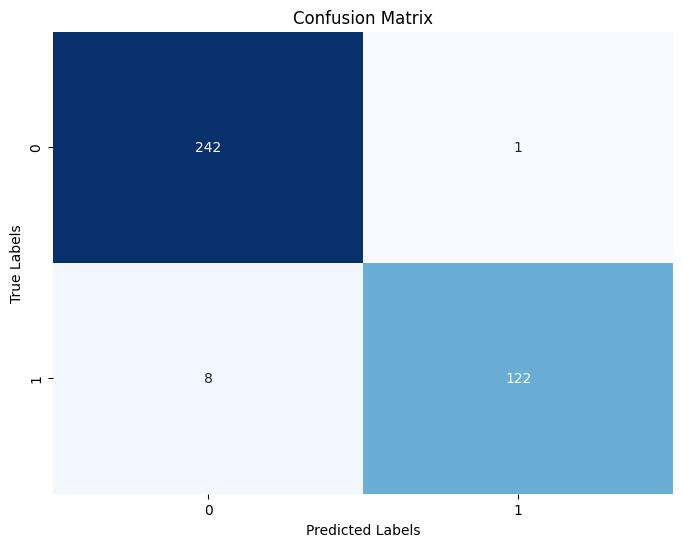

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [264]:
# performance metrics
xg_accuracy = accuracy_score(y_test, y_pred)
xg_precision = precision_score(y_test, y_pred)
xg_recall = recall_score(y_test, y_pred)
xg_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {xg_accuracy:.2f}")
print(f"Precision: {xg_precision:.2f}")
print(f"Recall: {xg_recall:.2f}")
print(f"F1-score: {xg_f1:.2f}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.94
F1-score: 0.96


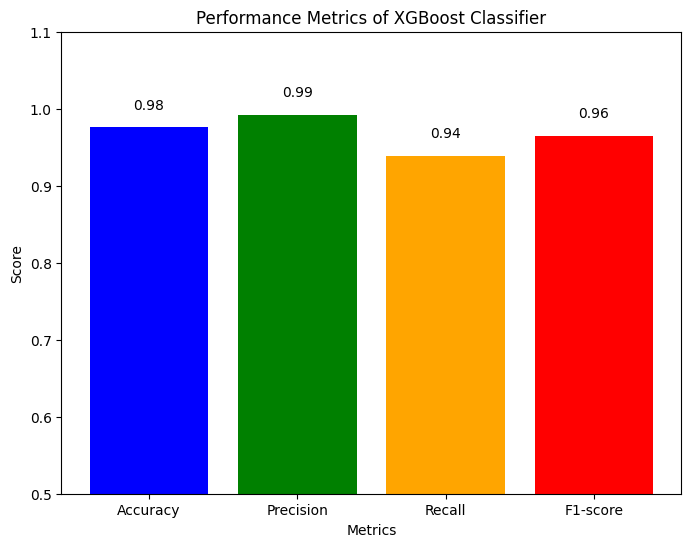

In [265]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [xg_accuracy, xg_precision, xg_recall, xg_f1]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.5, 1.1)  # Set y-axis limit to range from 0 to 1.1
plt.title('Performance Metrics of XGBoost Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Add values on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

These are the best performance metrics after choosing best parameters and feature scaling.


**Cross Validation**

In [266]:
from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
k_folds = 5  # number of folds

# Perform k-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_clf, X, y, cv=kf, scoring='accuracy')  # Using accuracy as the evaluation metric

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
xg_cv_scores = np.mean(cv_scores)

Cross-validation Scores: [0.97587131 0.98123324 0.96514745 0.97587131 0.98655914]
Mean Accuracy: 0.98


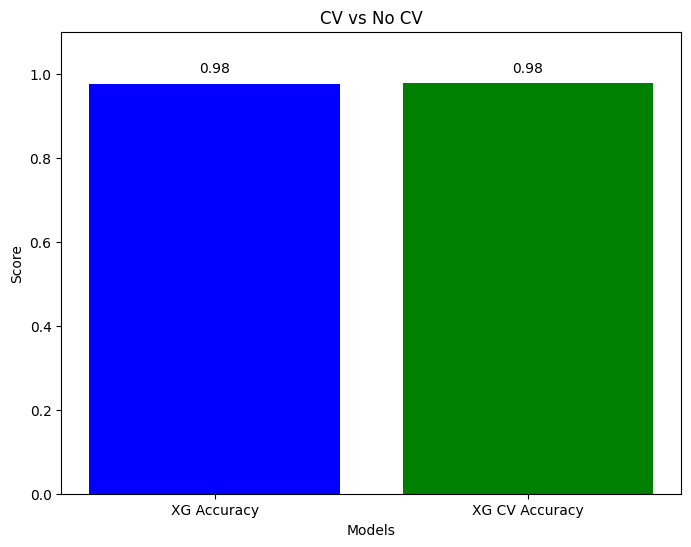

In [267]:
# Labels and values for the scores
labels = ['XG Accuracy', 'XG CV Accuracy']
scores = [xg_accuracy, xg_cv_scores]  # Average of cross-validation scores

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green'])
plt.ylim(0, 1.1)  # Set y-axis limit to ensure scores range from 0 to 1.1
plt.title('CV vs No CV')
plt.xlabel('Models')
plt.ylabel('Score')

# Add annotations on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

Here we performed k-fold Cross validation and compared the accuracy without CV. We perform cross validation because it test how model performs on new data.

# **SVM**

In [268]:
from sklearn.svm import SVC

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)  # Using the RBF kernel

# Train the classifier on the training data
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.78

Confusion Matrix:
[[221  22]
 [ 59  71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       243
           1       0.76      0.55      0.64       130

    accuracy                           0.78       373
   macro avg       0.78      0.73      0.74       373
weighted avg       0.78      0.78      0.77       373



The above is the accuracy without any hyperparameter tuning and feature scaling


**Hyperparameters Tuning**

In [269]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'kernel': ['rbf', 'linear', 'poly']  # Kernel type to test
}

# Create SVM classifier
svm_clf = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model obtained from Grid Search
best_svm_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with Best Model: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'kernel': 'linear'}

Accuracy with Best Model: 0.79

Confusion Matrix:
[[217  26]
 [ 51  79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       243
           1       0.75      0.61      0.67       130

    accuracy                           0.79       373
   macro avg       0.78      0.75      0.76       373
weighted avg       0.79      0.79      0.79       373



Above is the accuracy score after tuning the hyperparameters and we can see that it has higher score. so we use the above parameters and continue with feature scaling

**Scaling**

In [270]:
# Using minmax scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Create SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)  # Using the linear kernel

# Train the classifier on the training data
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80

Confusion Matrix:
[[218  25]
 [ 49  81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       243
           1       0.76      0.62      0.69       130

    accuracy                           0.80       373
   macro avg       0.79      0.76      0.77       373
weighted avg       0.80      0.80      0.80       373



In the above we perform feature scaling and chose min max scaler to see if performance improves further. this scales the values between 0 and 1 . we do this to improve performance

**Performance**

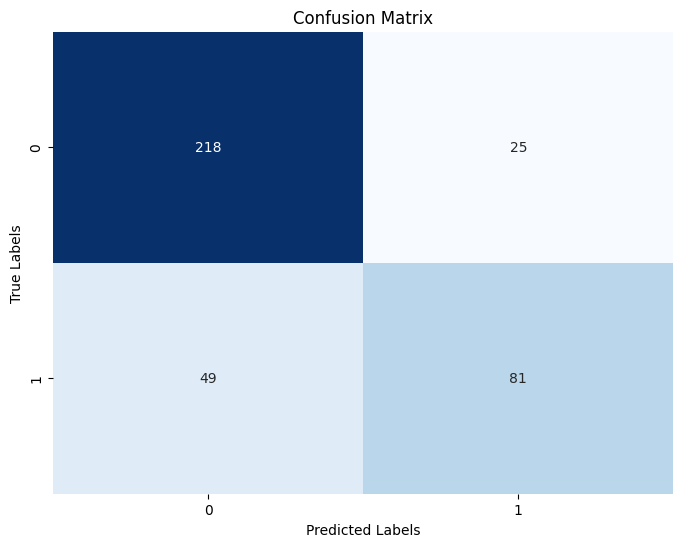

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [272]:
# performance metrics
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1:.2f}")

Accuracy: 0.80
Precision: 0.76
Recall: 0.62
F1-score: 0.69


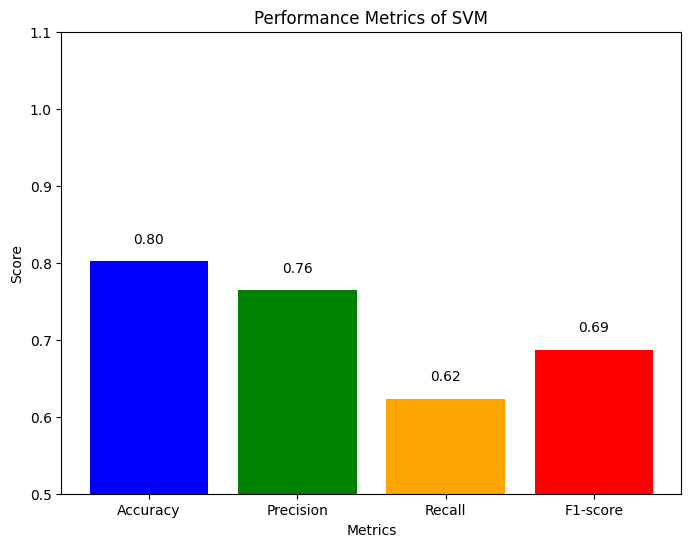

In [273]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.5, 1.1)  # Set y-axis limit to range from 0 to 1.1
plt.title('Performance Metrics of SVM')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Add values on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

These are the best performance metrics after choosing best parameters and feature scaling.

**Cross Validation**

In [274]:
from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
k_folds = 5  # number of folds

# Perform k-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=kf, scoring='accuracy')  # Using accuracy as the evaluation metric

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
svm_cv_scores = np.mean(cv_scores)

Cross-validation Scores: [0.80160858 0.78284182 0.80697051 0.76675603 0.78225806]
Mean Accuracy: 0.79


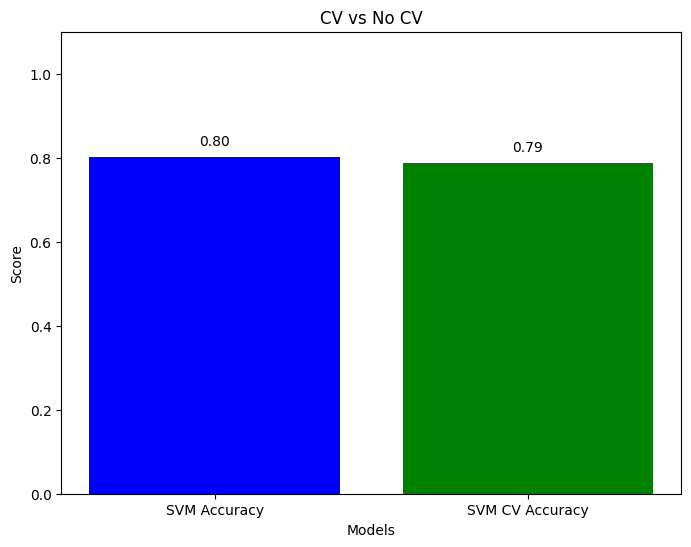

In [275]:
# Labels and values for the scores
labels = ['SVM Accuracy', 'SVM CV Accuracy']
scores = [svm_accuracy, svm_cv_scores]  # Average of cross-validation scores

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green'])
plt.ylim(0, 1.1)  # Set y-axis limit to ensure scores range from 0 to 1.1
plt.title('CV vs No CV')
plt.xlabel('Models')
plt.ylabel('Score')

# Add annotations on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

Here we performed k-fold Cross validation and compared the accuracy without CV. We perform cross validation because it test how model performs on new data.

# **KNN**

In [276]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors

# Train the classifier on the training data
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.81

Confusion Matrix:
[[216  27]
 [ 43  87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       243
           1       0.76      0.67      0.71       130

    accuracy                           0.81       373
   macro avg       0.80      0.78      0.79       373
weighted avg       0.81      0.81      0.81       373



The above is the accuracy without any hyperparameter tuning and feature scaling


**Hyperparameters Tuning**

In [277]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],           # Number of neighbors to test
    'weights': ['uniform', 'distance'],    # Weight function to calculate prediction
    'p': [1, 2]                            # Parameter for the Minkowski distance metric
}

# Create KNN classifier
knn_clf = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model obtained from Grid Search
best_knn_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with Best Model: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Accuracy with Best Model: 0.96

Confusion Matrix:
[[236   7]
 [  8 122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       243
           1       0.95      0.94      0.94       130

    accuracy                           0.96       373
   macro avg       0.96      0.95      0.96       373
weighted avg       0.96      0.96      0.96       373



Above is the accuracy score after tuning the hyperparameters and we can see that it has higher score. so we use the above parameters and continue with feature scaling

**Scaling**

In [278]:
# Using minmax scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Create KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')  # Using 5 neighbors

# Train the classifier on the training data
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97

Confusion Matrix:
[[237   6]
 [  6 124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.95      0.95      0.95       130

    accuracy                           0.97       373
   macro avg       0.96      0.96      0.96       373
weighted avg       0.97      0.97      0.97       373



In the above we perform feature scaling and chose min max scaler to see if performance improves further. this scales the values between 0 and 1 . we do this to improve performance


**Performance**

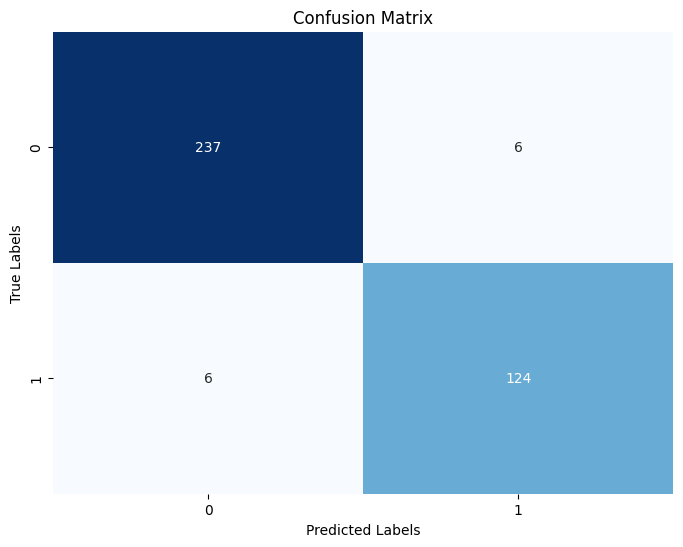

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# obtained predictions (y_pred) from  KNN model

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [280]:
# performance metrics
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-score: {knn_f1:.2f}")

Accuracy: 0.97
Precision: 0.95
Recall: 0.95
F1-score: 0.95


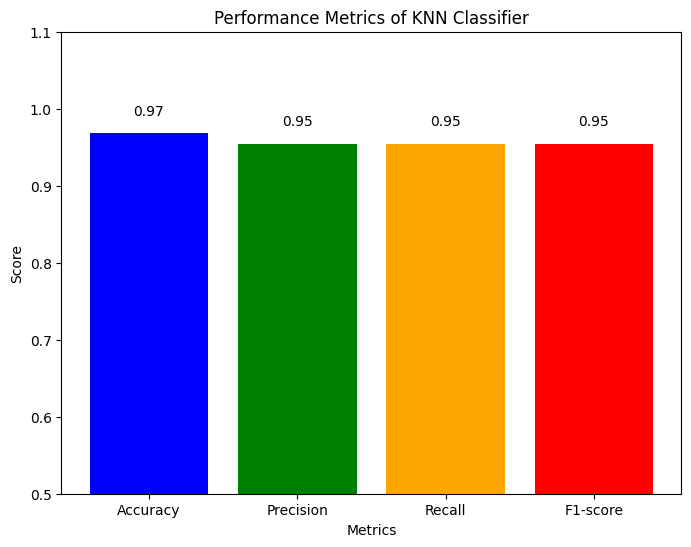

In [281]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.5, 1.1)  # Set y-axis limit to range from 0 to 1
plt.title('Performance Metrics of KNN Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Add values on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

These are the best performance metrics after choosing best parameters and feature scaling.


**Cross Validation**

In [282]:
from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
k_folds = 5  # number of folds
# Perform k-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_clf, X_scaled, y, cv=kf, scoring='accuracy')  # Using accuracy as the evaluation metric

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
knn_cv_scores = np.mean(cv_scores)

Cross-validation Scores: [0.96782842 0.98391421 0.96782842 0.98659517 0.99462366]
Mean Accuracy: 0.98


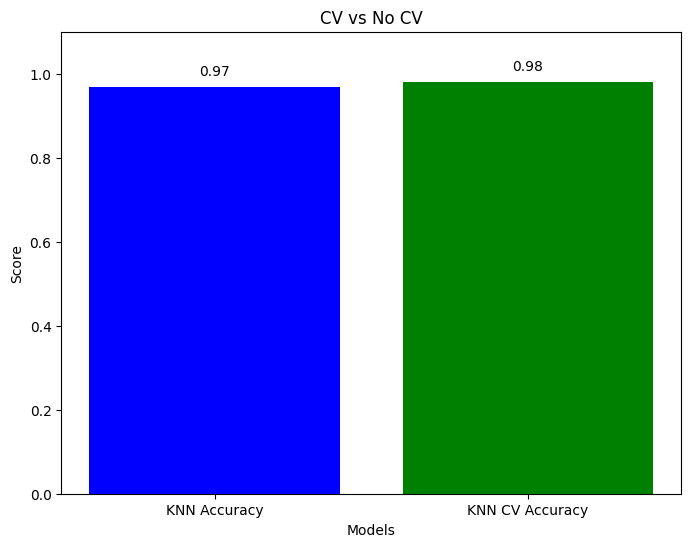

In [283]:

# Labels and values for the scores
labels = ['KNN Accuracy', 'KNN CV Accuracy']
scores = [knn_accuracy, knn_cv_scores]  # Average of cross-validation scores

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green'])
plt.ylim(0, 1.1)  # Set y-axis limit to ensure scores range from 0 to 1.1
plt.title('CV vs No CV')
plt.xlabel('Models')
plt.ylabel('Score')

# Add annotations on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()


Here we performed k-fold Cross validation and compared the accuracy without CV. We perform cross validation because it test how model performs on new data.

# **Best Model**

We are evaluating the performance of all models by Cross validation scores. cross validation is more representative of real world scenarios because it tests how model performs on unseen data

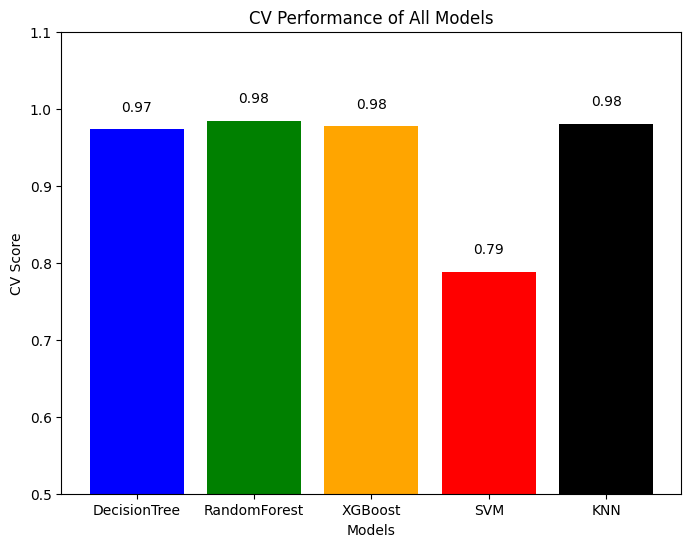

In [284]:
labels = ['DecisionTree', 'RandomForest', 'XGBoost', 'SVM', 'KNN']
scores = [dt_cv_scores, rf_cv_scores, xg_cv_scores, svm_cv_scores, knn_cv_scores]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red','black'])
plt.ylim(0.5, 1.1)  # Set y-axis limit to range from 0 to 1.1
plt.title('CV Performance of All Models')
plt.xlabel('Models')
plt.ylabel('CV Score')

# Add values on top of each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

From the above models we can see that Random Forest, XGBoost and KNN have high accuracy of 98%